In [1]:
%load_ext autoreload
%autoreload 2

import set_notebook

set_notebook.add_to_python_path()

# Generate test cases

In [2]:
from mat_mult.utils import generate_test_cases

N_TESTS = 25
MIN_DIM = 3
MAX_DIM = 20
MAX_LENGTHS = range(5, 19, 1)

# Naive vs Memoized algorithm

In [3]:
from mat_mult.mcm import naive_mcm, memoized_mcm
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
solver = naive_mcm
mean_time_memo = []
std_time_memo = []

for max_len in MAX_LENGTHS:
    test_cases = generate_test_cases(n_tests=N_TESTS,
                                     min_len=max_len,
                                     max_len=max_len,
                                     min_dim=MIN_DIM,
                                     max_dim=MAX_DIM)
    times = []
    for test in test_cases:
        t0 = time.time()
        solver(test[0])
        tf = time.time()
        times.append(tf-t0)
    
    mean_time_memo.append(np.mean(times))
    std_time_memo.append(np.std(times))
mean_time_memo = np.array(mean_time_memo)
std_time_memo = np.array(std_time_memo)

In [5]:
solver = memoized_mcm
mean_time_naive = []
std_time_naive = []

for max_len in MAX_LENGTHS:
    test_cases = generate_test_cases(n_tests=N_TESTS,
                                     min_len=max_len,
                                     max_len=max_len,
                                     min_dim=MIN_DIM,
                                     max_dim=MAX_DIM)
    times = []
    for test in test_cases:
        t0 = time.time()
        memoized_mcm(test[0])
        tf = time.time()
        times.append(tf-t0)
    
    mean_time_naive.append(np.mean(times))
    std_time_naive.append(np.std(times))
mean_time_naive = np.array(mean_time_naive)
std_time_naive = np.array(std_time_naive)

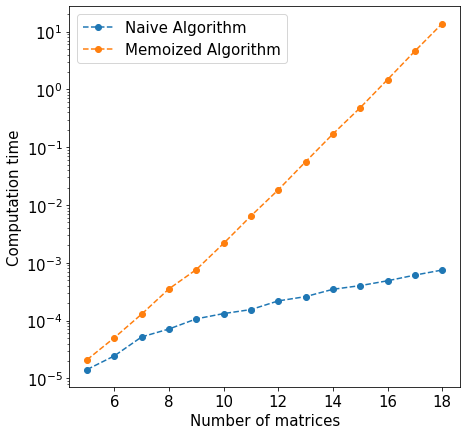

In [6]:
plt.figure(figsize=(7, 7))

plt.plot(MAX_LENGTHS, mean_time_naive, '--o', label='Naive Algorithm')
# plt.fill_between(MAX_LENGTHS, mean_time_naive - std_time_naive, mean_time_naive + std_time_naive, alpha=0.2)

plt.plot(MAX_LENGTHS, mean_time_memo, '--o', label='Memoized Algorithm')
# plt.fill_between(MAX_LENGTHS, mean_time_memo - std_time_memo, mean_time_memo + std_time_memo, alpha=0.2,)

plt.yscale('log')

plt.xlabel("Number of matrices", size=15)
plt.ylabel("Computation time", size=15)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(prop={'size': 15})

plt.savefig('../../../personal-website/docs/dynamic-programming-1/NaiveVSMemoized.png', dpi=500)